# Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


# Data Loading and Initial Inspection

In [16]:
df = pd.read_csv("Loan_Prediction.csv")
print("--- Initial Data Load and Missing Value Check ---")
# Check for missing values; previous analysis confirmed none.
print(f"Total rows: {len(df)}")
print(f"Missing values count (should be 0): {df.isnull().sum().sum()}")
print("--------------------------------------------------\n") 
df

--- Initial Data Load and Missing Value Check ---
Total rows: 20000
Missing values count (should be 0): 0
--------------------------------------------------



,age,gender,marital_status,education_level,annual_income,monthly_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,...,loan_term,installment,grade_subgrade,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
0,59,Male,Married,Master's,24240.19,2020.02,Employed,0.074,743,17173.72,...,36,581.88,B5,7,40833.47,24302.07,1,0,1,1
1,72,Female,Married,Bachelor's,20172.98,1681.08,Employed,0.219,531,22663.89,...,60,573.17,F1,5,27968.01,10803.01,1,0,3,1
2,49,Female,Single,High School,26181.80,2181.82,Employed,0.234,779,3631.36,...,60,76.32,B4,2,15502.25,4505.44,0,0,0,1
3,35,Female,Single,High School,11873.84,989.49,Employed,0.264,809,14939.23,...,36,468.07,A5,7,18157.79,5525.63,4,0,5,1
4,63,Other,Single,Other,25326.44,2110.54,Employed,0.260,663,16551.71,...,60,395.50,D5,1,17467.56,3593.91,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,39,Female,Married,Bachelor's,39640.08,3303.34,Employed,0.275,691,16322.23,...,36,566.22,C5,2,23748.10,5801.45,1,0,4,0
19996,66,Female,Married,Bachelor's,32062.90,2671.91,Employed,0.367,758,16697.34,...,36,553.71,B5,8,49929.65,40901.31,3,0,3,1
19997,65,Female,Single,Master's,18642.02,1553.50,Student,0.106,751,23924.78,...,36,772.66,B4,3,13137.57,5075.67,1,0,2,1
19998,35,Male,Married,Master's,22181.39,1848.45,Retired,0.275,646,16920.13,...,36,595.36,D2,5,19580.82,3876.16,4,0,5,1


# Visualize Key Features (EDA)

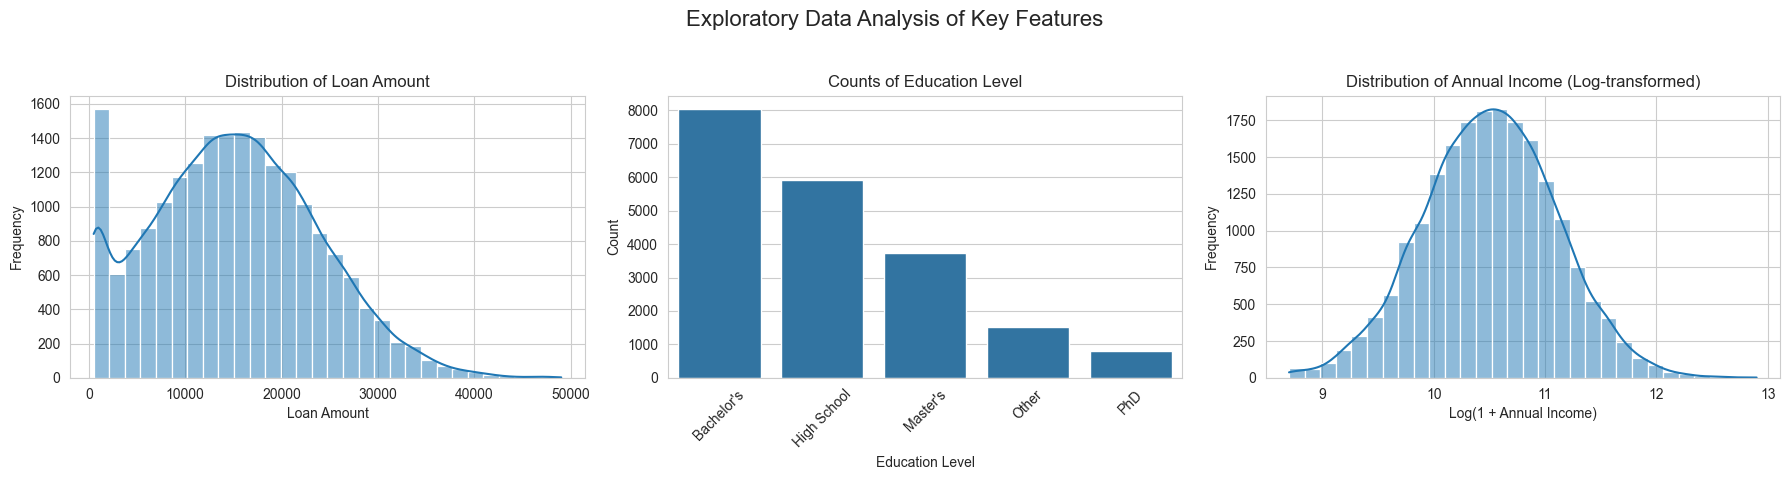

In [17]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Exploratory Data Analysis of Key Features', fontsize=16)

# Plot 1: Histogram of loan_amount
sns.histplot(df['loan_amount'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Loan Amount')
axes[0].set_xlabel('Loan Amount')
axes[0].set_ylabel('Frequency')

# Plot 2: Bar chart of education_level
education_counts = df['education_level'].value_counts()
sns.barplot(x=education_counts.index, y=education_counts.values, ax=axes[1])
axes[1].set_title('Counts of Education Level')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Histogram of annual_income (Log-transformed)
sns.histplot(np.log1p(df['annual_income']), bins=30, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Annual Income (Log-transformed)')
axes[2].set_xlabel('Log(1 + Annual Income)')
axes[2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('key_features_eda_combined.png')
# Output: key_features_eda_combined.png


# --- 3. Preprocessing for Logistic Regression Model ---
# One-Hot Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('loan_paid_back', axis=1)
y = df_encoded['loan_paid_back']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numerical columns for scaling
numerical_features_to_scale = ['age', 'annual_income', 'monthly_income', 'debt_to_income_ratio', 'credit_score',
                               'loan_amount', 'interest_rate', 'loan_term', 'installment', 'num_of_open_accounts',
                               'total_credit_limit', 'current_balance', 'delinquency_history', 'public_records', 'num_of_delinquencies']

# Scale numerical features

In [18]:
scaler = StandardScaler()
X_train[numerical_features_to_scale] = scaler.fit_transform(X_train[numerical_features_to_scale])
X_test[numerical_features_to_scale] = scaler.transform(X_test[numerical_features_to_scale])
scaler

,copy,True
,with_mean,True
,with_std,True


# Train Logistic Regression Model

In [19]:
log_reg = LogisticRegression(random_state=42, solver='liblinear')
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Model Evaluation

In [20]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("--- Model Evaluation (Logistic Regression) ---")
print(f"Model Accuracy: {accuracy:.4f}\n")

--- Model Evaluation (Logistic Regression) ---
Model Accuracy: 0.8872



# Calculate Confusion Matrix

In [21]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Actual vs. Predicted):")
print(cm)

Confusion Matrix (Actual vs. Predicted):
[[ 460  340]
 [ 111 3089]]


# Plot Confusion Matrix

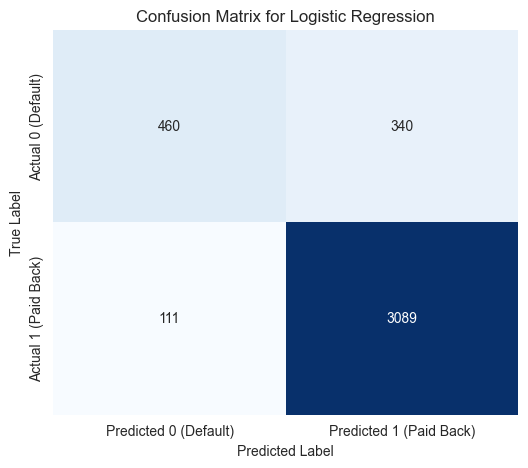

In [22]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0 (Default)', 'Predicted 1 (Paid Back)'],
            yticklabels=['Actual 0 (Default)', 'Actual 1 (Paid Back)'])
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_combined.png')
# Output: confusion_matrix_combined.png